In [56]:
from pathlib import Path
import glob
import os
import config as cfg
from utility.model_helper import map_model_name
import numpy as np
import pandas as pd
from utility.plot import make_bar_plot

matplotlib_style = 'default'
import matplotlib.pyplot as plt; plt.style.use(matplotlib_style)
plt.rcParams.update({'axes.labelsize': 'large',
                     'axes.titlesize': 'medium',
                     'font.size': 14.0,
                     'text.usetex': True,
                     'text.latex.preamble': r'\usepackage{amsfonts} \usepackage{bm}'})

N_DECIMALS = 2
ALPHA = 0.05

path = Path.joinpath(cfg.RESULTS_DIR, f"real_Me.csv")
df = pd.read_csv(path)
df = df.round(N_DECIMALS).fillna(0)

model_names = ["deepsurv", 'hierarch', 'mensa-nocop']
metric_names = ["MAEM"]

In [57]:
deepsurv_results = df.loc[df['ModelName'] == 'deepsurv'][['EvenId', 'Seed', 'MAEM']]
hierarch_results = df.loc[df['ModelName'] == 'hierarch'][['EvenId', 'Seed', 'MAEM']]
mensa_results = df.loc[df['ModelName'] == 'mensa-nocop'][['EvenId', 'Seed', 'MAEM']]

In [58]:
deepsurv_results_pivot = deepsurv_results.pivot(index='Seed', columns='EvenId', values='MAEM')
deepsurv_results_pivot = deepsurv_results_pivot[[1, 2, 3, 4]]
deepsurv_results_pivot_np = deepsurv_results_pivot.to_numpy()

hierarch_results_pivot = hierarch_results.pivot(index='Seed', columns='EvenId', values='MAEM')
hierarch_results_pivot = hierarch_results_pivot[[1, 2, 3, 4]]
hierarch_results_pivot_np = hierarch_results_pivot.to_numpy()

mensa_results_pivot = mensa_results.pivot(index='Seed', columns='EvenId', values='MAEM')
mensa_results_pivot = mensa_results_pivot[[1, 2, 3, 4]]
mensa_results_pivot_np = mensa_results_pivot.to_numpy()

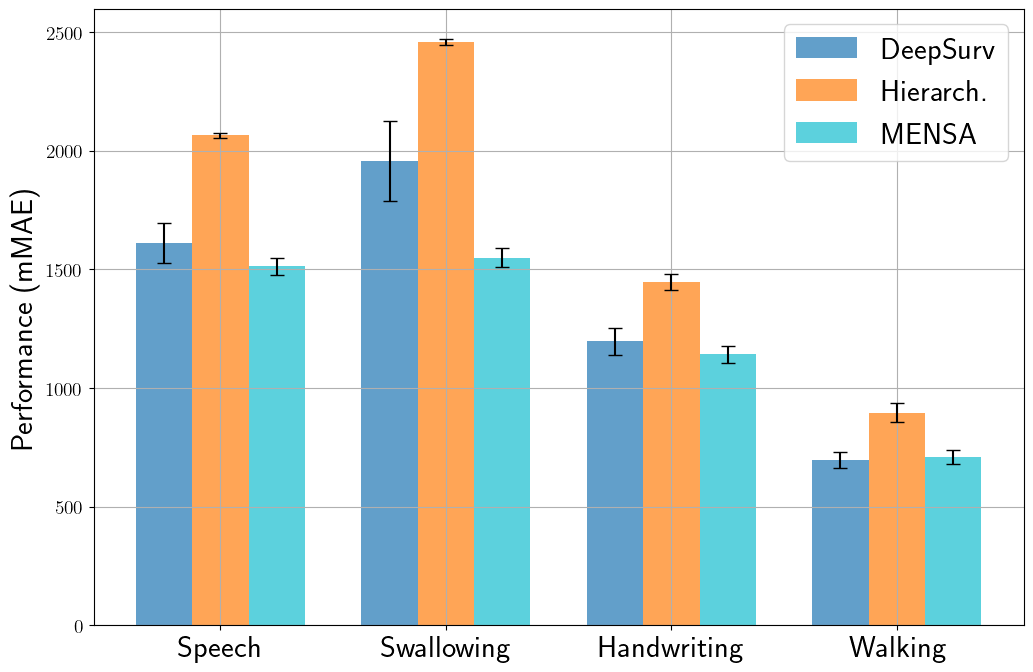

In [71]:
from scipy import stats

pivot_C0 = deepsurv_results_pivot
pivot_C1 = hierarch_results_pivot
pivot_C2 = mensa_results_pivot

# Event labels
event_labels = ['Speech', 'Swallowing', 'Handwriting', 'Walking']

# Calculate means and confidence intervals for each model
means_C0 = pivot_C0.mean(axis=0)
conf_intervals_C0 = pivot_C0.apply(lambda x: stats.sem(x) * stats.t.ppf((1 + 0.95) / 2., len(x) - 1), axis=0)

means_C1 = pivot_C1.mean(axis=0)
conf_intervals_C1 = pivot_C1.apply(lambda x: stats.sem(x) * stats.t.ppf((1 + 0.95) / 2., len(x) - 1), axis=0)

means_C2 = pivot_C2.mean(axis=0)
conf_intervals_C2 = pivot_C2.apply(lambda x: stats.sem(x) * stats.t.ppf((1 + 0.95) / 2., len(x) - 1), axis=0)

# Plot the data
plt.figure(figsize=(12, 8))

# Width of bars
bar_width = 0.25

# Positions of bars on x-axis
r1 = np.arange(len(means_C0))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create bars
plt.bar(r1, means_C0, width=bar_width, color='C0', yerr=conf_intervals_C0, capsize=5,
        align='center', alpha=0.7, label='DeepSurv')
plt.bar(r2, means_C1, width=bar_width, color='C1', yerr=conf_intervals_C1, capsize=5,
        align='center', alpha=0.7, label='Hierarch.')
plt.bar(r3, means_C2, width=bar_width, color='C9', yerr=conf_intervals_C2, capsize=5,
        align='center', alpha=0.7, label='MENSA')

# Add labels and title
plt.ylabel('Performance (mMAE)', fontsize=22)
plt.xticks([r + bar_width for r in range(len(means_C0))], event_labels, fontsize=22)

# Add legend
plt.legend(fontsize=22)

# Show the plot
plt.grid(True)

# Save the entire figure as a single PDF file
plt.savefig(f"{cfg.RESULTS_DIR}/als_performance.pdf", format='pdf', bbox_inches='tight')